# PROBLEM 2.4

#### RENE L. PRINCIPE JR              
###### 2015-04622

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


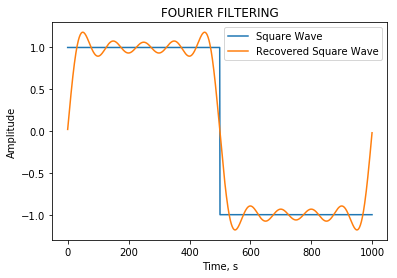

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr  7 11:55:04 2018

@author: Rene
"""

import numpy as np
import matplotlib.pyplot as plt
from cmath import exp,pi

N = 1000

#GENERATE A SQUARE WAVE

y = -np.ones(N)
y[:N//2]=1

#PERFORM A DISCRETE FOURIER TRANSFORM ON y

def dft(y):
    N = len(y)
    c = np.zeros(N,complex)
    for k in range(N):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c/N

c = (dft(y))

#SETTING THE FOURIER COEFFICIENTS, c, AFTER THE 10TH TERM TO 0

c[10:len(c)]= np.zeros(len(c)-10)

#PERFORM AN INVERSE DISCRETE FOURIER TRANSFORM ON THE MODIFIED c

def inv_dft(c):
    N = len(c)
    y_i = np.zeros(N,complex)
    for k in range(N):
        for n in range(N):
            y_i[k] += c[n]*exp(2j*pi*k*n/N)
    return 2*y_i

y_recovered = (inv_dft(c))

#PLOTS

plt.plot(y, label="Square Wave")
plt.plot(y_recovered, label="Recovered Square Wave")
plt.title("FOURIER FILTERING")
plt.legend()
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.show()

The wiggles and artifacts that is seen on the recovered square wave is best described by the Gibb's Phenomenon. According to the Gibb's Phenomenon, "these wiggles created when one tries to estimate a function that has a jump discontinuity with a Fourier series." Since our function is a square wave, the estimation tends to overshoot on the discontinuity. This could be lessened/smoothed if more harmonics were used, but in the graph, only the first 10 coefficients were used and the others were set to 0, which best explains the presence of wiggles and artifacts

Source: Merz, S. 'What is Gibb's Phenomenon'. Quora. (2017)
URL: https://www.quora.com/What-is-Gibbs-phenomenon
Date retrieved: April 7, 2017
